In [2]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.

In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as n

In [4]:
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).
# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100
# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoded labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

169001437/169001437 [==============================] - 26s 0us/step



Epoch 1/2


1563/1563 [==============================] - 21s 13ms/step - loss: 3.9401 - accuracy: 0.0948 - val_loss: 3.4860 - val_accuracy: 0.1704
Epoch 2/2
1563/1563 [==============================] - 19s 12ms/step - loss: 3.2832 - accuracy: 0.2042 - val_loss: 3.1319 - val_accuracy: 0.2344
313/313 - 2s - loss: 3.1319 - accuracy: 0.2344 - 2s/epoch - 5ms/step

Test accuracy: 0.23440000414848328


In [6]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming n_hidden_1, n_hidden_2, num_classes are defined earlier in your code

class NeuralNet(tf.keras.Model):
    # Set Layers.
    def __init__(self):
        super(NeuralNet, self).__init__()

        # First fully-connected hidden Layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)

        # Second fully-connected hidden Layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)

        # Output layer.
        self.out = layers.Dense(num_classes, activation=tf.nn.softmax)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)

        if not is_training:
            # tf cross entropy expects logits without softmax,
            # so only apply softmax when not training.
            x = tf.nn.softmax(x)

        return x

# Build neural network model.
neural_net = NeuralNet()

In [8]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
import tensorflow as tf

# Cross-Entropy Loss
def cross_entropy_loss(x, y):
    # Convert labels to int64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)

    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)

    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy Metric
def accuracy(y_pred, y_true):
    # Predicted class is the index of the highest score in the prediction vector.
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [9]:
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        # Forward pass
        pred = neural_net(x, is_training=True)

        # Compute Loss
        loss = cross_entropy_loss(pred, y)

    # Variables to update, i.e., trainable variables
    trainable_variables = neural_net.trainable_variables

    # Compute gradients
    gradients = g.gradient(loss, trainable_variables)

    # Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, trainable_variables))

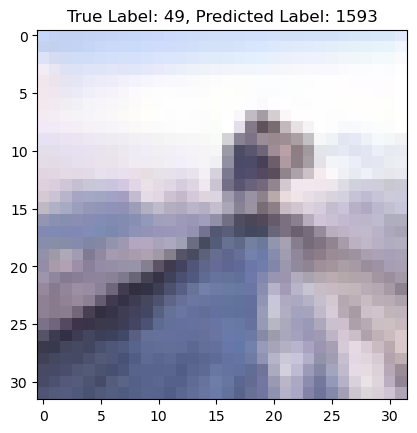

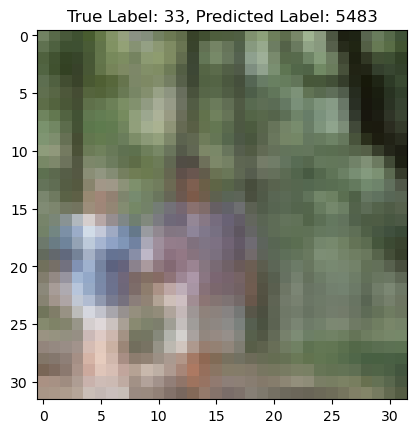

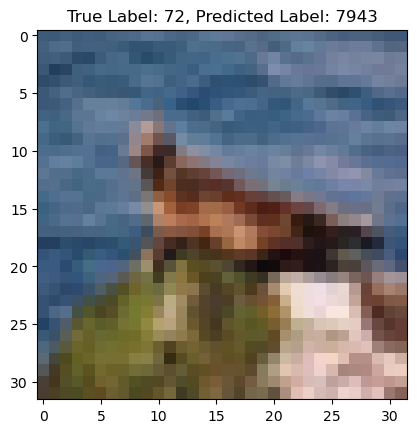

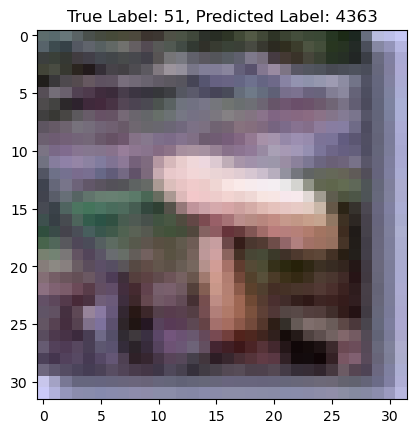

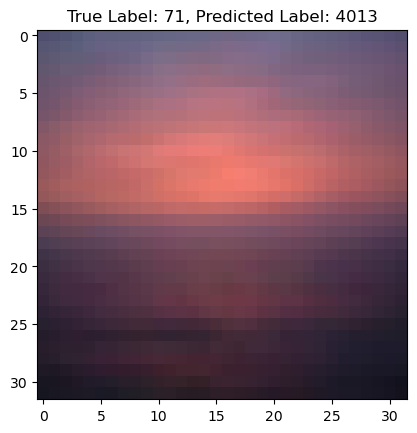

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a neural network model named 'neural_net' and the test set 'x_test'
n_images = 5
test_images = x_test[:n_images]
true_labels = y_test[:n_images]

# Predictions from the model
predictions = neural_net(test_images)

# Display images and model predictions
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [32, 32, 3]), cmap='gray')



    plt.title(f'True Label: {np.argmax(true_labels[i])}, Predicted Label: {np.argmax(predictions[i].numpy())}')
    plt.show()

In [11]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

In [12]:
batch_size=128
num_classes=10
epochs=20

In [13]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print('Shape-x:\t',xtrain.shape)
print('Shape-y:\t',ytrain.shape)

4422102/4422102 [==============================] - 0s 0us/step
Shape-x:	 (60000, 28, 28)
Shape-y:	 (60000,)


In [14]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)
print('Shape-x-train:\t',xtrain.shape)
print('Shape-x-Test:\t',xtest.shape)

Shape-x-train:	 (60000, 784)
Shape-x-Test:	 (10000, 784)


In [15]:
xtrain=xtrain/255.
xtest=xtest/255.

In [16]:
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')


60000 train samples
10000 test samples


In [17]:
import keras
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

In [18]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [20]:
histroy=model.fit(xtrain,ytrain,
 batch_size=batch_size,
 epochs=epochs,
 verbose=2,
 validation_data=(xtest,ytest))
score=model.evaluate(xtest,ytest,verbose=1)

Epoch 1/20
469/469 - 4s - loss: 0.5366 - accuracy: 0.8050 - val_loss: 0.4781 - val_accuracy: 0.8239 - 4s/epoch - 8ms/step
Epoch 2/20
469/469 - 5s - loss: 0.3752 - accuracy: 0.8612 - val_loss: 0.4274 - val_accuracy: 0.8434 - 5s/epoch - 10ms/step
Epoch 3/20
469/469 - 4s - loss: 0.3306 - accuracy: 0.8777 - val_loss: 0.3631 - val_accuracy: 0.8702 - 4s/epoch - 10ms/step
Epoch 4/20
469/469 - 3s - loss: 0.3051 - accuracy: 0.8858 - val_loss: 0.3370 - val_accuracy: 0.8795 - 3s/epoch - 7ms/step
Epoch 5/20
469/469 - 4s - loss: 0.2840 - accuracy: 0.8928 - val_loss: 0.4138 - val_accuracy: 0.8430 - 4s/epoch - 9ms/step
Epoch 6/20
469/469 - 5s - loss: 0.2702 - accuracy: 0.8975 - val_loss: 0.3724 - val_accuracy: 0.8706 - 5s/epoch - 10ms/step
Epoch 7/20
469/469 - 5s - loss: 0.2544 - accuracy: 0.9040 - val_loss: 0.3740 - val_accuracy: 0.8739 - 5s/epoch - 10ms/step
Epoch 8/20
469/469 - 4s - loss: 0.2460 - accuracy: 0.9071 - val_loss: 0.3288 - val_accuracy: 0.8878 - 4s/epoch - 10ms/step
Epoch 9/20
469/469 

In [21]:
print('Test Loss:\t',score[0])
print('Test Accuracy:\t',score[1])

Test Loss:	 0.458355188369751
Test Accuracy:	 0.8815000057220459
